In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
%cd "/content/drive/My Drive/NLP CZ4045/Datasets/"

!pip install import-ipynb
!pip install ipynb

import sys
sys.path.append('/content/drive/My Drive/NLP CZ4045/Datasets/')

/content/drive/.shortcut-targets-by-id/1IGRaZtn9SsUy5O6DIW6exasir4ARMioV/NLP CZ4045/Datasets


# Two articles from CNA

News: [Analysis-Japan may sell more bonds to fund next premier Kishida's stimulus package](https://www.channelnewsasia.com/business/analysis-japan-may-sell-more-bonds-fund-next-premier-kishidas-stimulus-package-2214981)

Commentary: [What difference would nuclear submarines really make to Australia?](https://www.channelnewsasia.com/commentary/australia-nuclear-submarines-how-different-what-impact-aukus-2209306)




In [ ]:
# word lengths: First Stylometric Test: Mendenhall’s Characteristic Curves of Composition
# vocab test: Second Stylometric Test: Kilgariff’s Chi-Squared Method

import nltk
import spacy
from nltk.tokenize import sent_tokenize
from bs4 import BeautifulSoup
from nltk.tag import pos_tag
from nltk.corpus import stopwords # Import the stop word list

nltk.download('averaged_perceptron_tagger') # ppn
nltk.download('punkt') # token sent
nltk.download('vader_lexicon') # sentiment analysis
nltk.download('stopwords')
nlp = spacy.load("en_core_web_sm")

import collections
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

stops = set(stopwords.words("english")) # set of stop words


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Hypothesis for CNA Articles: 

Writing style is generally informative, and follow good grammar and sentence structures as news websites are a commercial entity which caters to the general population. News article are normally written by 1 or 2 author with an editor who is responsible for formatting and ensuring that the news article follows proper grammars and have a cohesive sentence structure.

In [ ]:
!pwd

/content/drive/.shortcut-targets-by-id/1IGRaZtn9SsUy5O6DIW6exasir4ARMioV/NLP CZ4045/Datasets


In [ ]:
# open files

with open('news_cna.txt') as f:
    lines = f.readlines()

with open('commentary_cna.txt') as f:
    lines2 = f.readlines()

In [ ]:
data1="""let me preface this question by saying I have no idea if I'm asking the right question. I'm pretty new to c++, and I haven't gotten all of its nuances down yet.

Is there a way to take a text file and automatically generate c++ code? If yes, how do I do that? What are some resources that explain the process?

I'm making a game engine, and I am trying to design a system that allows me to plug and play with systems, without having to write a lot of boiler plate code.

If I explained this poorly, I will try explain it in a clearer way.

To do this I'm trying to use an entity system. Where I define a entity, or set of entities in a text file. Then at compile time I'd like to generate a cpp, and header file, that the linker can integrate with my system. I know I couldn't do this at run time, but I don't need it at run time. Once it's compiled the entity won't change unless I change it's base code.

I don't know if I've explained this well enough so here is an example for my player entity. I have the information about what properties it has. Properties are scripts the entity uses that runs a function when first called, every update, and on cleanup.

For example I have player.ped (ped means precise entity descriptor* but it is really just a text file.)

unique means there will only be one at a time, player is the name of the entity (and the id that other entities can use to look at the player entity (will only work with unique entities)), then the last three things before the curly brackets are tags, that tell the system to automatically add certain things to the entity (like the sprite tag will give the entity a texture, and vertex buffer for rendering so I don't have to write that over and over again), and all the things inside are properties I want the player to have.

What I want is a script that reads this .ped file and makes a c++ class or equivalent that would look something like this:

there is so much boilerplate code in defining that class, and since not every property uses every type of function call I don't want a bunch of if statements clogging up each function call if I know from compile time whether or not a property uses that function call. I don't want an

called every update if I know that transform will never have an update function.

I don't know how well I've explained my idea, and I don't know if what I want is possible. It just seems like such a useful idea to me. So why wouldn't it be a thing.

I don't mind If I have to write a script in a different language than c++. It will make my indie game design career a lot easier if I could set this up now, and just use it for all my games in the future.

*the precise doesn't really make sense. I just think .ped sounds and looks better then .ed. It is just a text file, but I will have things like pot.ped, and pot.pad (where pad is percise affix descriptor) for when I want to define an entity tag.

p.s. I'm trying to remake a game I created in python arcade over a year ago, but in c++ so it runs better, and I can actually create an exe file for the game that I can give to friends, or well add to itch.io.
"""

In [ ]:
data2="""Programming language books explain that value types are created on the stack, and reference types are created on the heap, without explaining what these two things are. I haven't read a clear explanation of this. I understand what a stack is. But,

Where and what are they (physically in a real computer's memory)?
To what extent are they controlled by the OS or language run-time?
What is their scope?
What determines the size of each of them?
What makes one faster?"""

In [ ]:
data3="""With a budget of 2.5-3k all in for a mid end pc with monitor+keyboard.
Should wait for GPU prices to drop next year(Question is, will it)?
Should top up abit to get top end GPU and processor? (Future proof?)
Coming from a laptop user past 10 years.
Should I be like everyone, top up abit just hoot a standard Aftershock system at about 3.5-4k and forget about other choices?
Looking for pre-built because no time to shop in SLS."""

In [ ]:
data4="""Very easy to set up. One USB cable, two power supply cables, that's it.

I have a suggestion for Edifier: Make a controller module that takes in all the input cables, and sends the wireless signals to the slave speakers. Or in other words, all speakers are slaves, and the only master is the controller module. Then you only have to manufacture one kind of speaker for both the L and R channels instead of needing to manufacture one master and one slave.

And if you use DARR83 for the master controller, then the users can even use surround speakers in a 4.0 setup. Or even mix and match - Use the surround speakers from S90 soundbar. And use the wireless subwoofer from... one of the products with wireless subwoofer. Or even four S3000... or even a mix of two S3000 and two Airpulse.

And then you can even have different master controllers for different price points - The cheapest can be a USB dongle with stereo or quad channel support (if not too expensive), a mid-end controller with analog inputs and some buttons and knobs, and a high-end one that works like an AVR, except no built-in speaker amps and it outputs everything to wireless speakers.

That would be the future of wireless home-theater audio. No worrying about wiring, amp power rating, cable thickness, how many channels the AVR has, and setting up. Just buy enough active speakers, pair them and we're all set.

And another suggestion to Edifier: Make it possible to switch L/R speakers. Although this is not really necessary - Analog connections can just swap connectors, Windows sources can just swap it via software, the only things going to have problems are for example disc players connecting via SPDIF. Still, if it can be added for little cost, it is something to good to have. Else like me right now - The slave speaker is located between the computer (source) and the master speaker, so the wireless is kind of pointless. If the slave can be on the right side for example then I can have the master close to the source and avoid some cabling. LS50 Wireless has this feature. Vanatoo Transparent Zero has this feature.

Pre-review thoughts

6.5" bookshelf is the most not-here-nor-there size in my opinion. Floorstander using multiple 6.5" drivers for bass output while still maintaining a slim(-looking) form factor is reasonable. But 6.5" bookshelf? The size is not big enough to cover the whole frequency spectrum, while too big for using on a desktop up close, yet still too small for using in a living room (If you want the ideal bass response anyway, I'm not stopping anyone from using any size in the living room; I'm using a 6.5" myself).

It does find its place in mid-range setups, like a studio, or a mid-size room.

My point is, it is not going to be straightforward trying to use a 6.5" with a desktop computer. Unless you have a ≥27" screen and a sitting position far enough to watch that screen comfortably.



Edifier calls the S3000 their flagship. Well, everything is definitely more expensive than the S2000. The planar tweeter may seem familiar, but Edifier says it is improved over the predecessor. And looking at the amp power available to the tweeters, which is actually lower on S3000, they must have at least improved the sensitivity alongside something else - I'm guessing linearity (a.k.a. distortion) should get an improvement from reduced power usage, but this is just my wild guess.

But to continue my talk from the previous section, I don't consider simply being bigger as being better. I mean, many studio monitor manufacturers manufacture speakers of different sizes. You wouldn't call LSR308 to be more flagship-y than LSR305 for example, right? Or maybe some might, just due to LSR308 being bigger and more expensive. Who knows.

At least S3000 does have some extra stuff over its smaller and older brother. That wireless connection between the L and R speakers. aptX HD and Bluetooth 5.0. USB input. That oval-shaped reflex port which I always like over circle reflex ports just because in physics theory the oval shape results in a smaller Q i.e. less peaky and wider frequency response compared to a perfect circle. Mostly small and natural improvements. Except the wireless connection between master/slave, that is definitely not a small feature. And the drivers definitely look different too.

Anyway, point is, don't immediately disregard smaller speakers (i.e. S2000) just because they are small. A smaller speaker in a small setup can sound better than a bigger speaker in the same setup. (And there are legit reasons for this too: Time alignment, frequency response, room interactions.)

And now, back to the S3000 and I am faced with a problem - How am I going to fit this in my room, and without the sound going all chaos?"""

In [ ]:
posts = [data1, data2, data3, data4]

In [ ]:
# process content into list of sentences

sentence = BeautifulSoup(" ".join(lines))

text =[]
for data in sentence.find_all("p"): # find text
  text.append(" ".join(sent_tokenize(data.get_text())))

print(text)
######################
sentence2 = BeautifulSoup(" ".join(lines2))

text2 =[]
for data in sentence2.find_all("p"): # find text
  text2.append(" ".join(sent_tokenize(data.get_text())))

print(text2)
######################
text3 =[]
text4 =[]
text5 =[]
text6 =[]
templ =[text3, text4, text5, text6]
count =0
for a in posts:
  temp =[]
  temp.append(sent_tokenize(a))
  # text3 =[]
  for i in temp[0]:
    templ[count].append(i)
  count+=1
######################

print(text3)
print(text4)
print(text5)
print(text6)

["TOKYO :     Japan's next Prime Minister Fumio Kishida may have little choice but to sell more government bonds to fund his pandemic-relief package worth hundreds of billions of dollars, even if it scrapes together money left over from previous stimulus programmes.", "A former foreign minister known as a proponent of fiscal reform, Kishida won the ruling party's leadership race on Wednesday, assuring him of being chosen as prime minister next week due to the party's majority in parliament.", 'Keen to give the pandemic-hit economy a quick boost, Kishida pledged to compile a stimulus package worth several tens of trillion yen - at one point flagging a size of around 30 trillion yen (US$270 billion).', "Some of the package could be funded by shifting nearly 20 trillion yen left over from past stimulus programmes, though that alone likely won't be enough, analysts say.", '"If Kishida wants a 30-trillion-yen package, he needs to issue about 9-12 trillion yen worth of new bonds," said Chota

In [ ]:
# given a list of sentences, count number of sentences with first letter capitalized

def checkSentenceCap(listOfSentences):
  sentenceCap = 0
  total = 0
  for i in listOfSentences: # i is sentence
    if len(i) > 2:
      total +=1
      for a in range(len(i)): # iterate through sentence 
        if i[a].isalpha(): # if word is made up of alphabets
          if i[a][0].isupper():
            sentenceCap+=1
          break;
  if total ==0:
    return 0;
  return sentenceCap/total

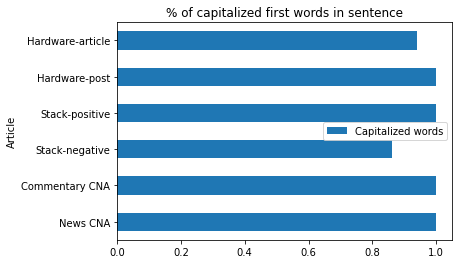

In [81]:
dataset = {"News CNA": checkSentenceCap(text), "Commentary CNA": checkSentenceCap(text2), "Stack-negative": checkSentenceCap(text3),
           "Stack-positive": checkSentenceCap(text4), "Hardware-post": checkSentenceCap(text5), "Hardware-article": checkSentenceCap(text6)}
df = pd.DataFrame(dataset.items(), columns = ['Article', 'Capitalized words'])
df.plot.barh(x='Article',y='Capitalized words', title = "% of capitalized first words in sentence")

Sentences all appear to be capped

In [ ]:
# given a list of sentences, get proper nouns and check if the first letter is capitalized

def checkPPNCap(listOfSentences):

  doc = nlp(" ".join(listOfSentences))
  propernouns=[str(tok) for tok in doc if tok.pos_=='PROPN']
  print(propernouns)

  cap=0
  for noun in propernouns:
    if noun[0].isupper():
      cap+=1
  if len(propernouns)==0:
    return None
  return cap/len(propernouns)
  # print("Proper nouns that are not capitalized: ",end="")

  # unique = set()
  # for i in listOfSentences:
  #   tagged_sent = pos_tag(i.split())
  #   for x in tagged_sent:
  #     unique.add(x)

  # propernouns = [word for word,pos in unique if pos == 'NNP']
  # print(propernouns)
  # return checkSentenceCap(propernouns)

['TOKYO', 'Japan', 'Prime', 'Minister', 'Fumio', 'Kishida', 'Kishida', 'Wednesday', 'prime', 'minister', 'Kishida', 'Kishida', 'Chotaro', 'Morita', 'SMBC', 'Nikko', 'Securities', 'Noriatsu', 'Tanji', 'Mizuho', 'Securities', 'March', 'Japan', 'Kishida', 'Kishida', 'Kishida', 'Japan', 'Kishida', 'Reuters', 'Bank', 'Japan', 'BOJ', 'YCC', 'BOJ', 'Governor', 'Haruhiko', 'Kuroda', 'Thursday', 'BOJ', 'Tetsushi', 'Kajimoto', 'Leika', 'Kihara', 'Kim', 'Coghill']
['CANBERRA', 'Australia', 'France', 'United', 'States', 'Australia', 'Non', '-', 'Proliferation', 'Treaty', 'Comprehensive', 'Test', 'Ban', 'Treaty', 'Treaty', 'Rarotonga', 'South', 'Pacific', 'Australia', 'speeds', 'US', 'US', 'UK', 'Mutual', 'Defence', 'Agreement', 'NATO', 'AUKUS', 'Australia', 'Indo', 'Pacific', 'Australia', 'Australia', 'Australia', 'HMAS', 'Dechaineux', 'Malaysia', 'Kota', 'Kinabalu', 'Collins', 'US', 'Mark', 'Australia', 'US', 'US', 'Navy', 'Virginia', 'class', 'Australia', 'Australia', 'United', 'States', 'Navy',

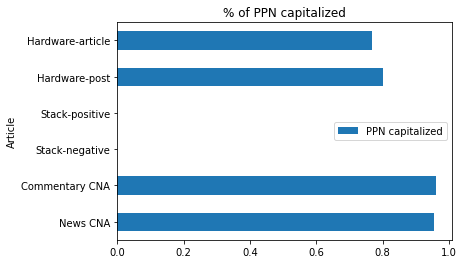

In [80]:
dataset = {"News CNA": checkPPNCap(text), "Commentary CNA": checkPPNCap(text2), "Stack-negative": checkPPNCap(text3),
           "Stack-positive": checkPPNCap(text4), "Hardware-post": checkPPNCap(text5), "Hardware-article": checkPPNCap(text6)}
df = pd.DataFrame(dataset.items(), columns = ['Article', 'PPN capitalized'])
df.plot.barh(x='Article',y='PPN capitalized', title = "% of PPN capitalized")

All proper nouns are capped. Note: stack article 1 does not have propernouns



```
# This is formatted as code
```

It was noted that some of the words nltk library identified as proper nouns were not proper nouns, such as "Editing", "Keen", "Much", etc. However, this does not interfere with the observation that proper nouns are properly capitalized.

## Word frequency analysis



In [ ]:
def sentenceLen(listOfSentences): # count number of words per sentence
  totalLength = 0; 
  tokens_without_punc =[]
  for i in listOfSentences:
    length = 0;
    tokens = nltk.word_tokenize(i)

    for token in tokens:
        if token.isalpha():
          length += 1;
    totalLength += length;

  return totalLength/len(listOfSentences)

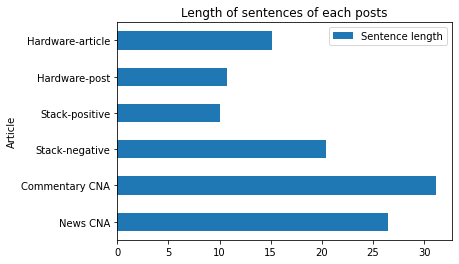

In [ ]:
dataset = {"News CNA": sentenceLen(text), "Commentary CNA": sentenceLen(text2), "Stack-negative": sentenceLen(text3),
           "Stack-positive": sentenceLen(text4), "Hardware-post": sentenceLen(text5), "Hardware-article": sentenceLen(text6)}
df = pd.DataFrame(dataset.items(), columns = ['Article', 'Sentence length'])
df.plot.barh(x='Article',y='Sentence length', title = "Length of sentences of each posts")

In [ ]:
def wordLen(listOfSentences):
  wordCount = 0;
  total =0;
  for x in listOfSentences: # get sentence
    total +=1 # count total number of words
    wordlist = x.split(" ")
    for i in wordlist: # get words
      wordCount += len(i)
  return (wordCount/total)



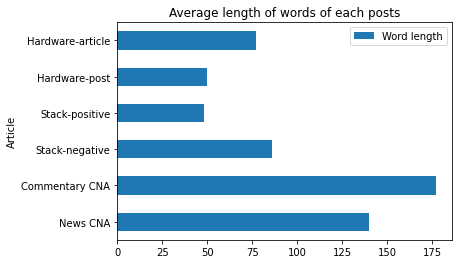

In [ ]:

dataset = {"News CNA": wordLen(text), "Commentary CNA": wordLen(text2), "Stack-negative": wordLen(text3),
           "Stack-positive": wordLen(text4), "Hardware-post": wordLen(text5), "Hardware-article": wordLen(text6)}
df = pd.DataFrame(dataset.items(), columns = ['Article', 'Word length'])
df.plot.barh(x='Article',y='Word length', title = "Average length of words of each posts")


# Unique vocabulary analysis


In [ ]:
def uniqueVocab(listOfSentences, dataset):
  counter ={}
  for i in listOfSentences:
    tokens = nltk.word_tokenize(i)
    for token in tokens:
      if token.isalpha() and str(token) not in stops:
        if token not in counter:
            counter[token] = 1
        else:
            counter[token] += 1
  word_counter = collections.Counter(counter)
  lst = word_counter.most_common(5)
  df = pd.DataFrame(lst, columns = ['Word', 'Count'])
  df.plot.barh(x='Word',y='Count', title = dataset) 

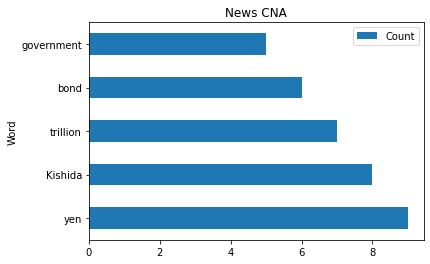

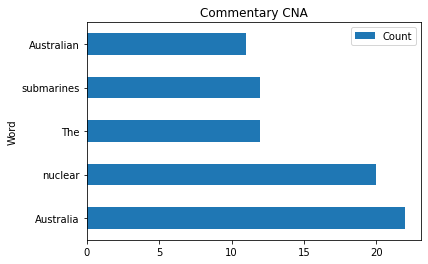

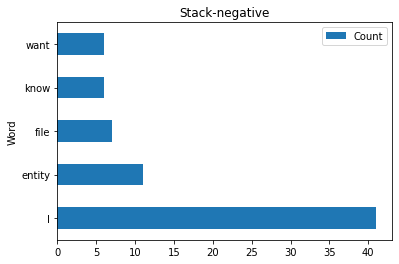

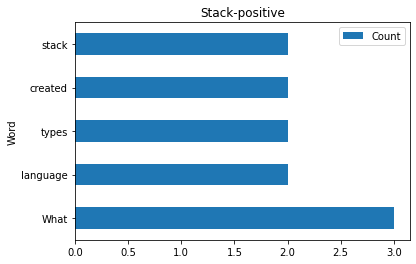

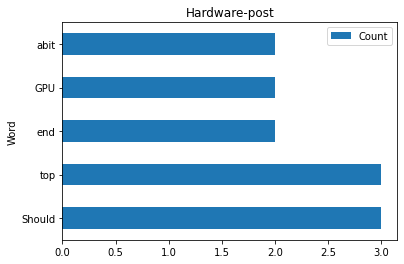

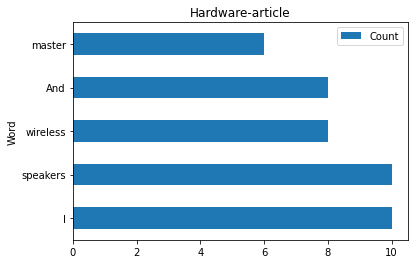

In [ ]:
uniqueVocab(text, "News CNA")
uniqueVocab(text2, "Commentary CNA")
uniqueVocab(text3, "Stack-negative")
uniqueVocab(text4, "Stack-positive")
uniqueVocab(text5, "Hardware-post")
uniqueVocab(text6, "Hardware-article")

Stop Words analysis

In [ ]:


def stopWords(listOfSentences):
  swCounter =0;
  total =0;
  for x in listOfSentences:
    tokens = nlp(x) # tokenized to nlp doc object
    for token in tokens:
        total+=1
        token_s = str(token).lower()
        if token_s.isalpha(): # tokens are all alphabets and not stopwords
            if token_s in stops and len(token_s) >1: 
                swCounter +=1
    return swCounter/total;


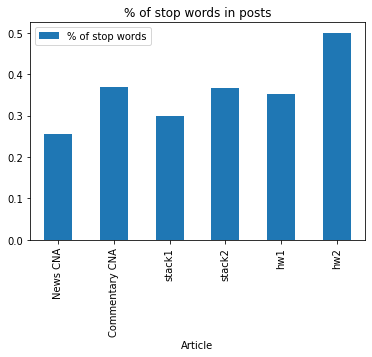

In [ ]:
dataset = {"News CNA": stopWords(text), "Commentary CNA": stopWords(text2), "Stack-negative": stopWords(text3),
           "Stack-positive": stopWords(text4), "Hardware-post": stopWords(text5), "Hardware-article": stopWords(text6)}
df = pd.DataFrame(dataset.items(), columns = ['Article', '% of stop words'])
df.plot.bar(x='Article',y='% of stop words', title = "% of stop words in posts")

# Observation: Analyzing with nltk toolkit fits the hypothesis



1. Starting words of sentence always starts with capital letter.
2. Passive language is used. 
3. Good grammar is observed. Sentence contains sva 
4. No typos
5. Proper nouns are capitalized
6. Expository - provided facts, figures, statistics


# Comparison with StackOverflow and HardwareZone